# ***Twitter Hashtag Prediction***

**Goal:**

The goal of the Twitter Hashtag Prediction project is to develop a machine learning and deep learning model that can automatically generate relevant hashtags based on the content of a tweet. This can enhance content visibility, engagement, and trend analysis.

In this project, I have developed a Machine Learning model that analyzes tweets about the weather forecast and predicts the associated hashtags. The model works by taking tweets as input and categorizing each word into three groups: 'Sentiments', 'When', and 'Kind'.

The 'Sentiments' category describes how people feel about the weather, classifying emotions as happy(positive), sad(negative) or neutral. The 'When' category indicates the timing of the weather, referring to past, present and future conditions. Lastly 'Kind' category describes the weather conditions such as hot, dry, or cold.

For this project, I employed a Many-to-Many Encoder-Decoder Sequence Model. This sequence model accepts a stream of sentences as input and produces another stream of sentences as output.

In [50]:
#importing all the required libraries
import pandas as pd
import numpy as np
import pickle
from statistics import mode
import nltk
from nltk import word_tokenize
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input,LSTM,Embedding,Dense,Concatenate,Attention
from sklearn.model_selection import train_test_split
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
path = "/content/drive/MyDrive/tweeter/train.csv"
df = pd.read_csv(path)
df

,id,tweet,state,location,s1,s2,s3,s4,s5,w1,...,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},oklahoma,Oklahoma,0.0,0.000,1.000,0.000,0.000,0.800,...,0.0,0.000,0.0,0.000,1.000,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,florida,Miami-Ft. Lauderdale,0.0,0.000,0.000,1.000,0.000,0.196,...,0.0,0.000,0.0,0.000,1.000,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,idaho,NaN,0.0,0.000,0.000,0.000,1.000,0.000,...,0.0,1.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,minnesota,Minneapolis-St. Paul,0.0,0.000,0.000,1.000,0.000,1.000,...,0.0,0.604,0.0,0.196,0.000,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,rhode island,Purgatory,0.0,0.000,0.000,0.403,0.597,1.000,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,1.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77941,120095,"Current Conditions: Fair, 78 FForecast: Sat - ...",florida,"Jacksonville, Florida",0.0,0.000,1.000,0.000,0.000,0.206,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.794,0.0,0.0
77942,120097,WE DOIN SOMETHING DIFFERENT... SINCE THE WEATH...,colorado,"Denver,Colorado",0.0,0.000,0.000,1.000,0.000,1.000,...,0.0,1.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0
77943,120098,OMG #WeatherForecast for tomm 80 degrees & Sun...,pennsylvania,"Philadelphia, United States",0.0,0.000,0.000,1.000,0.000,0.000,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,1.000,0.0,0.0
77944,120100,@mention Oh no! We had cold weather early in t...,alabama,Birmingham (Ann and Tusc),0.0,0.385,0.410,0.205,0.000,0.416,...,0.0,0.000,0.0,0.211,0.591,0.0,0.0,0.000,0.0,0.0


In [3]:
df.shape

(77946, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77946 entries, 0 to 77945
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        77946 non-null  int64  
 1   tweet     77946 non-null  object 
 2   state     77946 non-null  object 
 3   location  66994 non-null  object 
 4   s1        77946 non-null  float64
 5   s2        77946 non-null  float64
 6   s3        77946 non-null  float64
 7   s4        77946 non-null  float64
 8   s5        77946 non-null  float64
 9   w1        77946 non-null  float64
 10  w2        77946 non-null  float64
 11  w3        77946 non-null  float64
 12  w4        77946 non-null  float64
 13  k1        77946 non-null  float64
 14  k2        77946 non-null  float64
 15  k3        77946 non-null  float64
 16  k4        77946 non-null  float64
 17  k5        77946 non-null  float64
 18  k6        77946 non-null  float64
 19  k7        77946 non-null  float64
 20  k8        77946 non-null  fl

I have explored the 'train.csv' file and extracted all the input texts. The input data consists of the tweet column which contains user tweets while the target data includes the Sentiment, When and Kind columns. The target label values will be the hashtag value of respective labels from s1 to k15.

In [5]:
#tweet column is input
inp_data = df["tweet"]

#target data is sentiment(s1,s2,s3,s4,s5) ,
#when (w1,w2,w3,w4) and kind(k1,k2,k3...k15)
tar_data = df.iloc[:,4:].values

#get the column name of target
tar_lab = df.iloc[:,4:].columns.tolist()

#value of the target label like
#s1="I can't tell" , s2="Negative" and so on till s5
#w1="current weather", w2=future forecast and so on till w4
#k1="clouds", k2="cold", k3="dry" and so on till k15
tar_lab_val = [
"I can't tell","Negative","Neutral / author is just sharing information","Positive","Tweet not related to weather condition",
"current (same day) weather","future (forecast)","I can't tell","past weather",
"clouds","cold","dry","hot","humid","hurricane","I can't tell","ice","other","rain",
"snow","storms","sun","tornado","wind"]

In [6]:
#input data
inp_data

,tweet
0,Jazz for a Rainy Afternoon: {link}
1,RT: @mention: I love rainy days.
2,Good Morning Chicago! Time to kick the Windy C...
3,Preach lol! :) RT @mention: #alliwantis this t...
4,@mention good morning sunshine
...,...
77941,"Current Conditions: Fair, 78 FForecast: Sat - ..."
77942,WE DOIN SOMETHING DIFFERENT... SINCE THE WEATH...
77943,OMG #WeatherForecast for tomm 80 degrees & Sun...
77944,@mention Oh no! We had cold weather early in t...


In [7]:
#target data
tar_data

array([[0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 1.   , 0.   , 0.   ],
       [0.   , 0.385, 0.41 , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.202, 0.395, ..., 0.   , 0.   , 0.   ]])

In [8]:
#target Labels
tar_lab

['s1',
 's2',
 's3',
 's4',
 's5',
 'w1',
 'w2',
 'w3',
 'w4',
 'k1',
 'k2',
 'k3',
 'k4',
 'k5',
 'k6',
 'k7',
 'k8',
 'k9',
 'k10',
 'k11',
 'k12',
 'k13',
 'k14',
 'k15']

In [9]:
#Label Values
tar_lab_val

["I can't tell",
 'Negative',
 'Neutral / author is just sharing information',
 'Positive',
 'Tweet not related to weather condition',
 'current (same day) weather',
 'future (forecast)',
 "I can't tell",
 'past weather',
 'clouds',
 'cold',
 'dry',
 'hot',
 'humid',
 'hurricane',
 "I can't tell",
 'ice',
 'other',
 'rain',
 'snow',
 'storms',
 'sun',
 'tornado',
 'wind']

### Preprocessing

We need to clean the texts, as they might be incomplete and they cannot be sent directly to the model. So I have created a function called 'clean()' that removes numbers, and alphanumeric words and expand the contraction words which are combinations of two words, shortened using apostrophes.

In [10]:
contractions = {"i'm": "i am",
                "it's": "it is",
                "can't":"cannot"}

#clean the tweets
def clean(tweet):
#replace and lower case the tweets
  tweet = tweet.replace(":","").lower()
#get only words that contains alphabets
  words = list(filter(lambda w:(w.isalpha()),tweet.split(" ")))
#expand the shortened words
  words = [contractions[w] if w in contractions else w for w in words ]
#return all the words
  return words

Now we will pass our input data to the 'clean()' function to get clean words and tweets.

In [11]:
#Initializing empty lists to store text and words
inp_texts = []
inp_words = []

#iterate over input data
for tweet in inp_data:
#clean the tweets
  inpt_words = clean(tweet)
#store the input texts and words
  inp_texts += [' '.join(inpt_words)]
  inp_words += inpt_words

In [12]:
inp_texts

['jazz for a rainy afternoon',
 'rt i love rainy',
 'good morning time to kick the windy city in the nuts and head back',
 'preach rt this type of weather all the i live for beautiful days like',
 'good morning sunshine',
 'rather be storm',
 'pm feels east',
 'holy hope i come out alive is the',
 'mild monday best weather day of the week in oklahoma',
 'with the snow forecast for tahoe this maybe the riders need to bust out the bikes',
 'no signs of the appocolypse sunshine and warm',
 'outside humidity wind press rain',
 'another at least getting how bad is this',
 'rt rainy afternoons are great for hot broccoli cheese',
 'can already tell going to be a tough scoring as windy right now as it was yesterday',
 'a lil chilly all good to words for call of that is',
 'loving the sugarland even though im soaking wet and lol',
 'gonna do big things today running during shit weather and writing my essay of the same',
 'today was windy i wanna go meet up and get my sis from school',
 'perfect

In [13]:
inp_words

['jazz',
 'for',
 'a',
 'rainy',
 'afternoon',
 'rt',
 'i',
 'love',
 'rainy',
 'good',
 'morning',
 'time',
 'to',
 'kick',
 'the',
 'windy',
 'city',
 'in',
 'the',
 'nuts',
 'and',
 'head',
 'back',
 'preach',
 'rt',
 'this',
 'type',
 'of',
 'weather',
 'all',
 'the',
 'i',
 'live',
 'for',
 'beautiful',
 'days',
 'like',
 'good',
 'morning',
 'sunshine',
 'rather',
 'be',
 'storm',
 'pm',
 'feels',
 'east',
 'holy',
 'hope',
 'i',
 'come',
 'out',
 'alive',
 'is',
 'the',
 'mild',
 'monday',
 'best',
 'weather',
 'day',
 'of',
 'the',
 'week',
 'in',
 'oklahoma',
 'with',
 'the',
 'snow',
 'forecast',
 'for',
 'tahoe',
 'this',
 'maybe',
 'the',
 'riders',
 'need',
 'to',
 'bust',
 'out',
 'the',
 'bikes',
 'no',
 'signs',
 'of',
 'the',
 'appocolypse',
 'sunshine',
 'and',
 'warm',
 'outside',
 'humidity',
 'wind',
 'press',
 'rain',
 'another',
 'at',
 'least',
 'getting',
 'how',
 'bad',
 'is',
 'this',
 'rt',
 'rainy',
 'afternoons',
 'are',
 'great',
 'for',
 'hot',
 'broccol

We will begin by passing our input data to the 'clean()' function to obtain clean words and tweets. Next, we will convert the confidence scores of 'sentiments', 'when' and 'kind' back into labels. Since we can only select one value from 'sentiments' and 'when' labels, we will use the maximum confidence score. For the 'kind' category, we will consider all values that have a confidence score greater than 0.5.
Additionally, we need to define a starting and ending point for the target data. This will tell the model from where the sentence begins and ends.

In [14]:
tar_texts = []

#iterate over target data
for lab in tar_data:
#get the index of maximum value from sentiment data(s1 to s5)
#with the help of this index get the label value
  senti = tar_lab[np.argmax(lab[:5])]

#get the index of maximum value from when data(w1 to w4)
#with the help of this index get the label value
  when = tar_lab[np.argmax(lab[5:9])+5]

#get the index of values greater than 0.5 and get the label value from it
  kind = [tar_lab[ind] for ind, ele in enumerate(lab[9:len(lab)],9) if ele>=0.5]

#store the target text which is a combination of sentiment, when and kind data
#add sos at start and eos at end of text
  tar_texts += ["sos "+" ".join([senti]+[when]+kind)+" eos"]

In [18]:
tar_texts

['sos s3 w1 k10 eos',
 'sos s4 w3 k10 eos',
 'sos s5 w3 k7 eos',
 'sos s4 w1 k7 eos',
 'sos s5 w1 k13 eos',
 'sos s3 w3 k12 eos',
 'sos s3 w1 k15 eos',
 'sos s5 w1 k4 eos',
 'sos s4 w1 k7 eos',
 'sos s3 w2 k11 eos',
 'sos s4 w1 k13 eos',
 'sos s3 w1 k10 k15 eos',
 'sos s2 w1 k10 k12 eos',
 'sos s4 w1 k10 eos',
 'sos s3 w1 k15 eos',
 'sos s5 w1 k2 eos',
 'sos s2 w1 k2 k10 eos',
 'sos s2 w1 k7 eos',
 'sos s2 w1 k15 eos',
 'sos s4 w1 k7 eos',
 'sos s5 w1 k4 eos',
 'sos s2 w4 k4 eos',
 'sos s3 w1 k7 eos',
 'sos s2 w1 k1 k2 k10 eos',
 'sos s2 w1 k2 k10 eos',
 'sos s4 w4 k7 eos',
 'sos s4 w1 k4 eos',
 'sos s3 w3 k12 eos',
 'sos s2 w1 k7 eos',
 'sos s2 w1 k4 eos',
 'sos s3 w1 k7 eos',
 'sos s5 w3 k13 eos',
 'sos s3 w1 eos',
 'sos s5 w1 k13 eos',
 'sos s4 w1 k7 eos',
 'sos s2 w1 k7 eos',
 'sos s4 w1 k10 eos',
 'sos s3 w1 k7 eos',
 'sos s3 w1 k2 eos',
 'sos s3 w1 k10 eos',
 'sos s3 w2 k7 eos',
 'sos s3 w1 k12 eos',
 'sos s4 w3 k12 eos',
 'sos s2 w1 k4 eos',
 'sos s3 w1 k7 eos',
 'sos s2 w1 k12 

Now we will determine the number of unique words in both the input and target data, along with the maximum lengths of the input and target texts.

In [19]:
#only store unique words from the input and target word lists
inp_words = sorted(list(set(inp_words)))
num_inp_words = len(inp_words)
num_tar_words = len(tar_lab)+2

#get the length of the input and the target texts which appears most frequently
max_inp_len = mode([len(i) for i in inp_texts])
max_tar_len = mode([len(i) for i in tar_texts])

print("Number of input words: ", num_inp_words)
print("Number of target words: ", num_tar_words)
print("Maximum input length: ", max_inp_len)
print("Maximum target length: ", max_tar_len)

Number of input words:  27940
Number of target words:  26
Maximum input length:  14
Maximum target length:  16


### Training and Testing Sets

Finally, we will split the input and target texts into a 90:10 ratio. 90% for the training set and 10% for the testing set.

In [20]:
#splitting the input and target texts into a 90:10 ratio.
x_train,x_test,y_train,y_test = train_test_split(inp_texts,tar_texts,test_size=0.1,random_state=42)

### Text Vectorization

Our model requires numeric data, so we will use text vectorization. This technique converts textual data into numeric form. Numeric data works as an index of respective textual data. Tokenizing all the elements of the list and making a dictionary having keys as tokens and value as their index+1. This process will enable us to convert our input and target text into sequences of integers.

In [21]:
#Use all of the words from training input and output to train the tokenizer.
inp_tokenizer = Tokenizer()
inp_tokenizer.fit_on_texts(x_train)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(y_train)

#convert text to an integer sequence where the integer represents the word index
x_train= inp_tokenizer.texts_to_sequences(x_train)
y_train= tar_tokenizer.texts_to_sequences(y_train)

Next we need to ensure that all input data and target texts are of the same length. We will pad an array of 0's to the integer sequence if it is smaller than the provided maximum input length using 'max_inp_len' and 'max_tar_len' variables.

We will pad our encoder input data(x_train) and decoder input data(y_train) but it won't include the last word 'eos'.
The decoder target data will be the same as the decoder input data except that it will be one timestep ahead as it will not include the first word of our target sentence, 'sos'.

In [25]:
#If the length is less than the maximum length, pad the array with 0s.
enc_inp_data = pad_sequences(x_train, maxlen = max_inp_len, padding = 'post', dtype = "float32")
dec_data = pad_sequences(y_train, maxlen = max_tar_len, padding = 'post', dtype = "float32")

#The last word, ie 'eos,' will not be included in the decoder input data.
dec_inp_data = dec_data[:,:-1]

#decoder target data will be one time step ahead as it will not include the first initial word i.e 'sos'
dec_tar_data = dec_data.reshape(len(dec_data), max_tar_len, 1)[:,1:]

### Model Building

The LSTM network will consist of three stacked layers, which will improve our prediction.
The input of the encoder will be used in the first LSTM layer, and so on, creating a continuous succession of LSTM layers.
After each LSTM layer is executed, we will pass hidden state output as well as states.

In [30]:
from keras import backend as K
K.clear_session()
latent_dim = 500

#create an input object with the shape equal to the maximum number of input words
enc_inputs = Input(shape=(max_inp_len,))
enc_embedding = Embedding(num_inp_words+1, latent_dim)(enc_inputs)

#create 3 stacked LSTM layer
#1st LSTM layer keeps only output
enc_lstm1= LSTM(latent_dim, return_state=True, return_sequences=True)
enc_outputs1, *_ = enc_lstm1(enc_embedding)

#2nd LSTM layer keeps only output
enc_lstm2= LSTM(latent_dim, return_state=True, return_sequences=True)
enc_outputs2, *_ = enc_lstm2(enc_outputs1)

#3rd LSTM layer keeps output as well as its states
enc_lstm3= LSTM(latent_dim, return_sequences=True, return_state=True)
enc_outputs3 , state_h3 , state_c3 = enc_lstm3(enc_outputs2)

#encoder states
enc_states = [state_h3, state_c3]

We will build the decoder input tensor similar to the encoder's. The initial state of the decoder is where we will pass the hidden state and cell state values that we obtained from the encoder's LSTM layer.

Then the encoder and decoder outputs will be passed to the attention layer, which will then concatenate the attention layer outputs with the decoder outputs.

In [42]:
# Decoder.
dec_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_tar_words+1, latent_dim)
dec_embedding = dec_emb_layer(dec_inputs)

#initialize the LSTM layer of the decoder with the encoder's output states
dec_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
dec_outputs, *_ = dec_lstm(dec_embedding, initial_state=enc_states)

#Attention layer
attention = Attention()
attn_out = attention([dec_outputs, enc_outputs3])

#Merge the attention output with the decoder outputs
merge= Concatenate(axis=-1, name='concat_layer1')([dec_outputs,attn_out])

We will now build our Dense layer, which will serve as the model's output layer. It will have the output dimension that matches the number of target word units and will utilize the softmax activation function.

In [44]:
#fully connected Dense layer for the output
dec_dense = Dense(num_tar_words+1, activation='softmax')
dec_outputs = dec_dense(merge)

### Training the model

Finally, we will set up encoder and decoder inputs, along with the decoder output, in our model class. We will plot the model layers and generate a summary of our model.

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 14)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 14, 500)        │     13,970,500 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 14, 500),      │      2,002,000 │ embedding[0][0]        │
│                           │ (None, 500), (None,    │                │                        │
│                           │ 500)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 14, 500),      │      2,002,000 │ lstm[0][0]             │
│                           │ (None, 500), (None,    │                │                        │
│                           │ 500)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, None, 500)      │         13,500 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ [(None, 14, 500),      │      2,002,000 │ lstm_1[0][0]           │
│                           │ (None, 500), (None,    │                │                        │
│                           │ 500)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ [(None, None, 500),    │      2,002,000 │ embedding_2[0][0],     │
│                           │ (None, 500), (None,    │                │ lstm_2[0][1],          │
│                           │ 500)]                  │                │ lstm_2[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_1 (Attention)   │ (None, None, 500)      │              0 │ lstm_4[0][0],          │
│                           │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concat_layer1             │ (None, None, 1000)     │              0 │ lstm_4[0][0],          │
│ (Concatenate)             │                        │                │ attention_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 27)       │         27,027 │ concat_layer1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 22,019,027 (84.00 MB)

 Trainable params: 22,019,027 (84.00 MB)

 Non-trainable params: 0 (0.00 B)

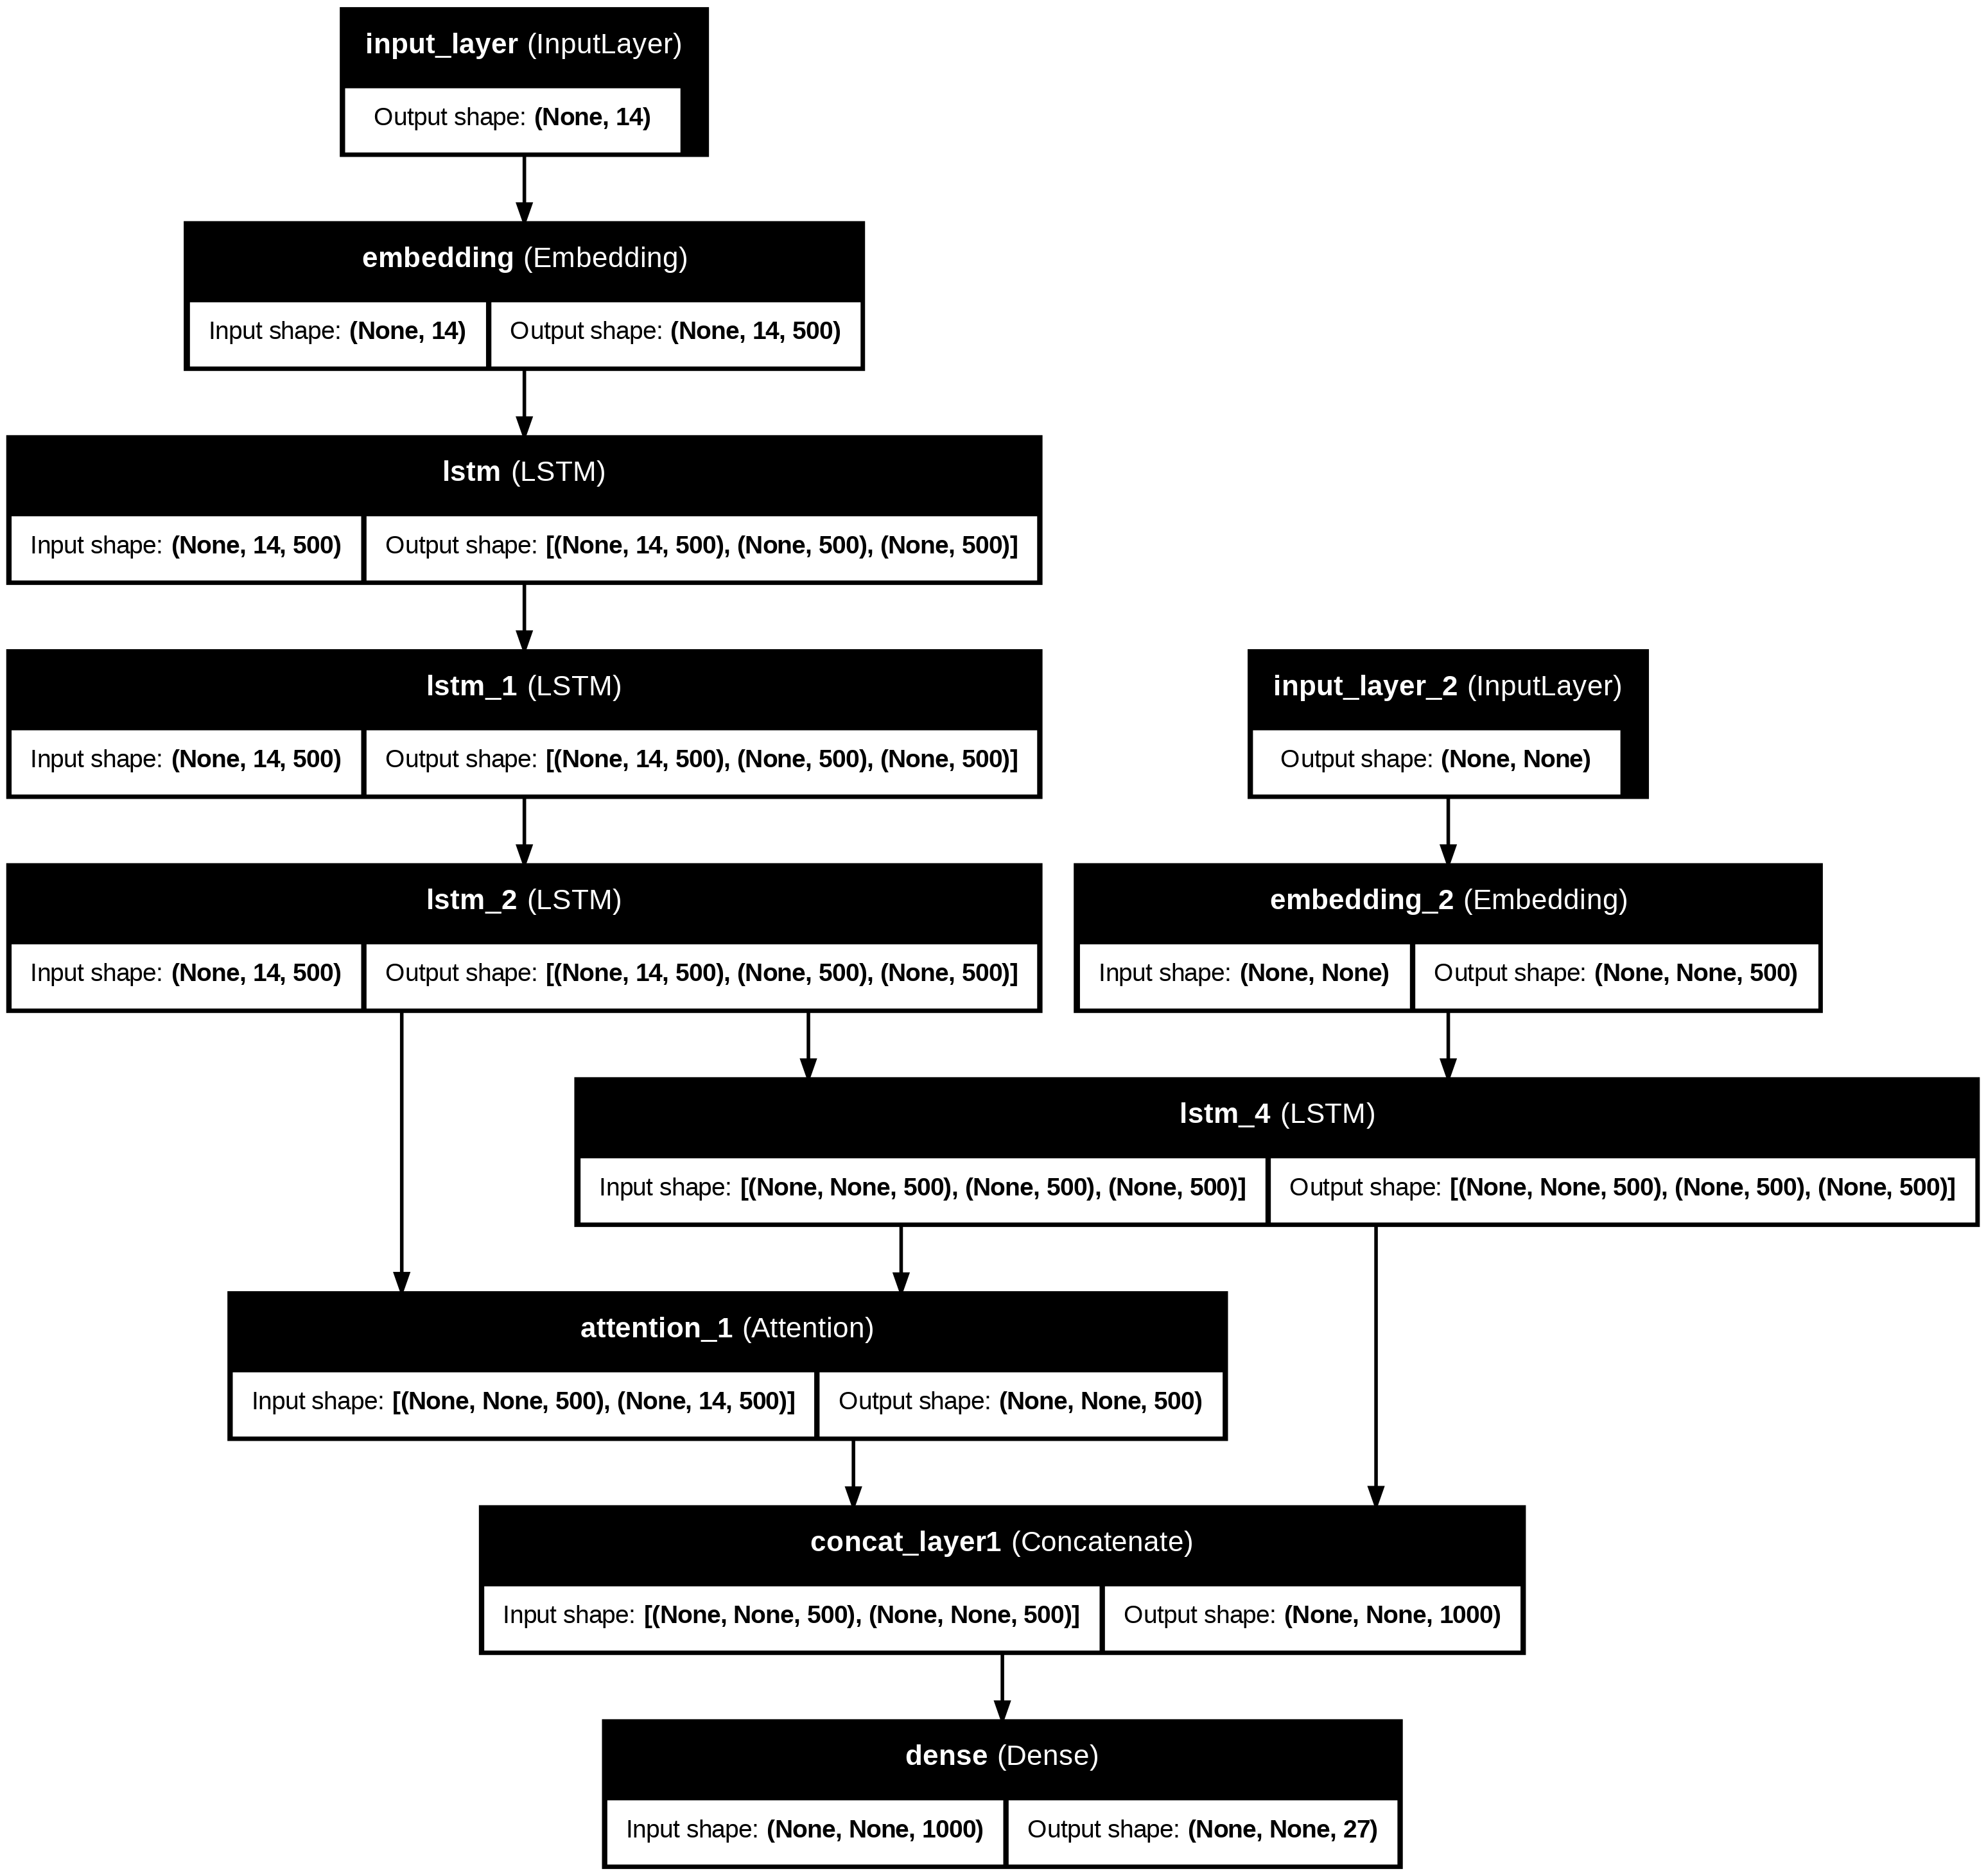

In [47]:
#Model class and model summary
model = Model([enc_inputs, dec_inputs], dec_outputs)

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Now we will train our model by passing the encoder input data and decoder input data as input, while the decoder target data as output with 500 batch size, for 10 epochs, using the 'rmsprop' optimizer.

In [49]:
#compiling the model using the RMSProp optimizer
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#train the model with input and target data from the encoder and decoder
model.fit([enc_inp_data, dec_inp_data], dec_tar_data, batch_size=500, epochs=10)

#Save the model with the name “s2s”
model.save("s2s.keras")

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1185s 8s/step - accuracy: 0.7871 - loss: 0.7966
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1193s 8s/step - accuracy: 0.8781 - loss: 0.3552
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1170s 8s/step - accuracy: 0.8797 - loss: 0.3383
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1157s 8s/step - accuracy: 0.8831 - loss: 0.3232
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1148s 8s/step - accuracy: 0.8895 - loss: 0.3101
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1157s 8s/step - accuracy: 0.8958 - loss: 0.2955
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1143s 8s/step - accuracy: 0.9010 - loss: 0.2822
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1155s 8s/step - accuracy: 0.9074 - loss: 0.2680
Epoch 9/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1166s 8s/step - accuracy: 0.9097 - loss: 0.2615
Epoch 10/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1141s 8s/step - accuracy: 0.9120 - loss: 0.2557


After training the model, we achieved an accuracy of 91.20%.

### Inference Model

We will use the trained model to create an inference architecture for both the encoder and decoder. By using the inference model we will test our model on new sentences.

In [52]:
# encoder inference model
latent_dim=500

#load the saved model
model = models.load_model("s2s.keras")

The 0th layer, i.e the input object we constructed, will be the input for the inference encoder model and the output will be the output of the last LSTM, which is the 6th layer.

In [53]:
#construct an encoder model from the output of the 6th layer of LSTM
enc_outputs, state_h_enc, state_c_enc = model.layers[6].output
enc_states = [state_h_enc, state_c_enc]

#add input data and state data from the layer
enc_model = Model(model.input[0],[enc_outputs]+enc_states)

We will get the input, embedding and LSTM layers from the stored model, just as the encoder inference model. The shape of the latent dimensions will be used to initialize the decoder hidden input and the other two states.

In our case the attention layer is the eighth layer. The attention layer output will then be concatenated with the decoder output.

In [54]:
# decoder inference model
#create Input object of hidden state and cell state for decoder
dec_state_input_h = Input(shape=(latent_dim,))
dec_state_input_c = Input(shape=(latent_dim,))
dec_hidden_state_input = Input(shape=(max_inp_len, latent_dim))

#Get all the layers from the model
dec_inputs = model.input[1]
dec_emb_layer = model.layers[5]
dec_lstm = model.layers[7]
dec_embedding = dec_emb_layer(dec_inputs)

#add input and initialize the LSTM layer with decoder’s hidden and cell state
dec_outputs2, state_h2, state_c2 = dec_lstm(dec_embedding, initial_state = [dec_state_input_h, dec_state_input_c])

#Attention layer
attention = model.layers[8]
attn_out1 = attention([dec_outputs2, dec_hidden_state_input])
merge2 = Concatenate(axis=-1)([dec_outputs2, attn_out1])

Similarly, the Dense layer(output layer) which is the tenth layer of our saved model, will follow this process.

In [55]:
#Dense layer for decoder output
dec_dense = model.layers[10]
dec_outputs2 = dec_dense(merge2)

# Finally define the Decoder model Class
dec_model = Model([dec_inputs] + [dec_hidden_state_input, dec_state_input_h, dec_state_input_c], [dec_outputs2] + [state_h2, state_c2])

Next, we will assign state vectors to the input sequence. For each pair, we will create an empty array to contain the intended sequence and generate the starting word, which in our case is 'sos'.
Using this state value and the input sequence, we will predict the output index. To obtain the corresponding word from the output index, we will use the reverse target word index and append it to the decoded sequence.

Assign the index of our word to the target sequence, so that our target sequence has a vector of the previous word for the next iteration. Iterate until the current word equals the last word(in our example, 'eos') or until the maximum length of the target text is reached.

In [56]:
#create a dictionary with all indexes as key and respective target label as values
reverse_tar_word_index = tar_tokenizer.index_word
reverse_inp_word_index = inp_tokenizer.index_word
tar_word_index = tar_tokenizer.word_index
reverse_tar_word_index[0] = ' '

def decode_sequence(inp_seq):
#get the encoder outputs and states(hidden and cell) by passing the input sequence
  enc_out, enc_h, enc_c = enc_model.predict(inp_seq)

#target sequence with starting initial word as 'sos'
  tar_seq = np.zeros((1, 1))
  tar_seq[0, 0] = tar_word_index['sos']

#Stop the iteration if the iteration reaches end of the text
  stop_condition = False

#merge every predicted word in decoded sentence
  decoded_sentence = ""

  while not stop_condition:
#get predicted output words, hidden and cell state for the model
      output_words, dec_h, dec_c = dec_model.predict([tar_seq] + [enc_out, enc_h, enc_c])

#Using index get the word from the dictionary
      word_index = np.argmax(output_words[0, -1, :])
      text_word = reverse_tar_word_index[word_index]
      decoded_sentence += text_word + " "

#Stop when we either hit max length or reach the terminal word i.e. eos.
      if text_word == "eos" or len(decoded_sentence) > max_tar_len:
         stop_condition = True

#update target sequence with the current word index for the next prediction
         tar_seq = np.zeros((1, 1))
         tar_seq[0, 0] = word_index

#update encoder hidden and cell states with the decoder's current state
         enc_h, enc_c = dec_h, dec_c

#return the decoded sentence string
         return decoded_sentence

In [57]:
#Creating a dictionary with key as labels and their corresponding value
lab_val = dict((i, v) for i,v in zip(tar_lab, tar_lab_val))

for i in range(0, 20, 3):

#tokenize the x_test and convert into integer sequence
    inp_x = inp_tokenizer.texts_to_sequences([x_test[i]])

#pad the sequence with zeros to ensure consistent input length
    inp_x = pad_sequences(inp_x, maxlen = max_inp_len, padding = 'post')

#reshape the input x_test
    tag = decode_sequence(inp_x.reshape(1, max_inp_len)).replace('eos','')

#printin the original tweet
    print("Tweet:", x_test[i])

#get actual hashtags from the test labels
    print("Actual Hashtag:", " ".join(["#" + lab_val[i] for i in y_test[i][4:-4].split(" ")]))
#get predicted hashtags from the decoded tag
    print("Predicted Hashtag:", " ".join(["#" + lab_val[i] for i in word_tokenize(tag)]))

    print("\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Tweet: its so cold out where did spring
Actual Hashtag: #Negative #current (same day) weather #cold
Predicted Hashtag: #Negative #Negative #Negative #Negative #Negative #Negative


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Tweet: finally made it out of for breakfast and then see how the weather looks a little
Actual Hashtag: #Neutral / author is just sharing information #current (same day) weather #I can't tell
Predicted Hashtag: #Positive #Positive #Positive #Positive #Positive #Positive


1/1 ━━━━━━━━

### Conclusion:

The Twitter Hashtag Prediction project effectively showcases the potential of natural language processing(NLP) models in real-world scenarios. Using a well-structured sequence-to-sequence model along with proper preprocessing, the system achieves an impressive accuracy of 91.20%, effectively capturing the relationships between tweet content and relevant hashtags, including sentiments, timeframes and weather conditions. This capability makes it a valuable tool for content discovery, trend analysis and optimizing engagement on social media platforms.